# Chapter4. 신경망 학습

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100%!important;}</style>"))

In [2]:
from IPython.display import Image
import numpy as np

## 4.1 데이터에서 학습한다!

기계학습의 경우, 사람이 데이터의 특징을 찾아 설계하면 기계가 데이터로부터 규칙을 찾아냄 </br>
하지만 신경망의 경우 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습!

##  4.2 손실함수

신경망 학습에서는 현재의 상태를 '하나의 지표(=**손실함수**)'로 표현하고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색함 </br>
손실함수로는 일반적으로 오차제곱합과 교차 엔트로피 오차를 사용


### 4.2.1 오차제곱합

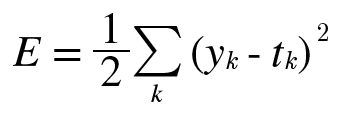

In [3]:
Image("image/e 4.1.png")

= 추정값과 레이블의 차의 제곱값

In [4]:
# 함수로 구현

def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [5]:
# 정답과 가깝게 추정했을 때

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답을 '2'로 설정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# 정답과 멀게 추정했을 때 

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정

sum_squares_error(np.array(y), np.array(t))

0.5975

**=> 올바른 방향으로 추정할 경우 오차제곱합이 작아지는 것을 볼 수 있음!**

### 4.2.2 교차 엔트로피 오차

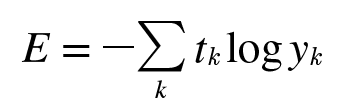

In [7]:
Image("image/e 4.2.png")

t값은 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 **-> 정답일 때 추정값의 자연로그를 계산** </br>

In [8]:
# 함수로 구현

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [9]:
# 정답과 가깝게 추정했을 때

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답을 '2'로 설정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [10]:
# 정답과 멀게 추정했을 때 

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

많은 데이터를 대상으로 일일이 손실함수를 계산하는 것은 불가능하기 때문에 데이터의 일부를 추려 전체의 '근사치'로 이용 **-> 미니배치 학습**

#### MNIST 데이터로 해보자

In [11]:
import tensorflow as tf

train_data,test_data = tf.keras.datasets.mnist.load_data()
(x_train, t_train) = train_data
(x_test, t_test) = test_data

x_train = x_train.reshape(-1, 28**2)
x_test = x_test.reshape(-1, 28**2)

In [12]:
# 데이터 shape 확인
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
train_size = t_train.shape[0]
batch_size=10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [14]:
def cross_entropy_error(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t*np.log(y+1e-7)) / batch_size # 이미지 한 장당 평균의 교차 엔트로피 오차를 계산

### 4.2.5 왜 손실함수를 설정하는가? 

매개변수를 찾을 때 왜 '정확도'라는 지표를 놔두고 '손실함수의 값'이라는 우회적인 방법을 택할까?</br>
- 우리는 어떤 지표를 미분해서 '기울기'를 얻는데, 기울기는 가중치 매개변수의 값을 변화시켰을 때 그 지표가 어떤 방향으로 바뀌는를 의미함 
- 하지만 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되어버림
- 활성화 함수로 계단함수를 사용하지 않는 것도 같은 이유!

## 4.3 수치 미분

In [15]:
# 나쁜 구현의 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x)) / h

=> h를 무한히 0으로 좁히는 것이 불가능하기 때문에 생기는 한계가 있음 

#### 차분

수치 미분에서의 오차를 줄이기 위해 x+h, x-h일 때의 함수 f의 차분을 계산 -> **중심차분** 또는 **중앙차분** 이라고 함!

In [16]:
def numerical_diff(f, x):
    h = 1e-4 # =0.0001
    return (f(x+h)-f(x-h)) / 2*h

### 4.3.3 편미분

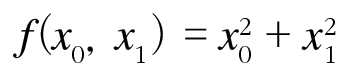

In [17]:
Image("image/e 4.6.png")

In [18]:
# 위 식을 함수로 구현

def function_2(x):
    return x[0]**2 + x[1]**2

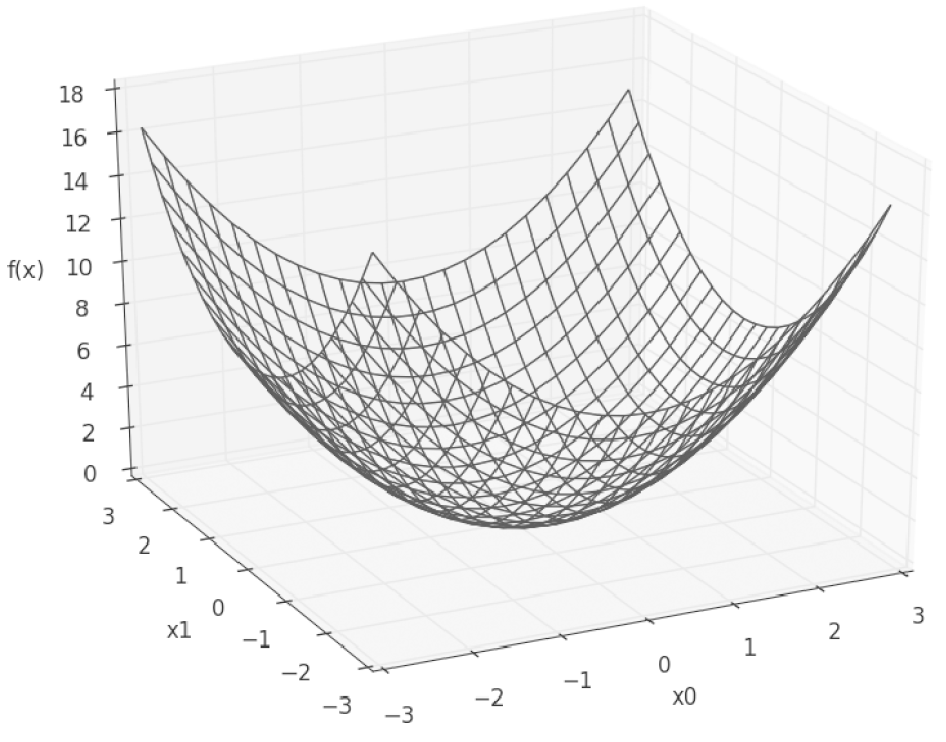

In [19]:
Image("image/fig 4-8.png")

- 그림을 그려보면 3차원 형태의 그래프가 나오게 됨
- 두 변수 중 어느 변수에 대한 미분을 할 것인지 구분할 필요가 있음!
- 가령 x0에 대해 미분할 경우, x1은 상수로 취급하여 미분

## 4.4 기울기

모든 변수의 편미분을 벡터로 정리한 것 -> **기울기**

In [20]:
def numerical_gradient(f, x):
    
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모두 0인 배열 만들기
    
    for idx in range(x.size):
        
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 복원
        
    return grad

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [22]:
# (3,4)에서의 기울기
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [23]:
# (0,2)에서의 기울기
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [24]:
# (3,0)에서의 기울기
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

기울기의 결과에 마이너스를 붙인 벡터를 그려보면 다음과 같다

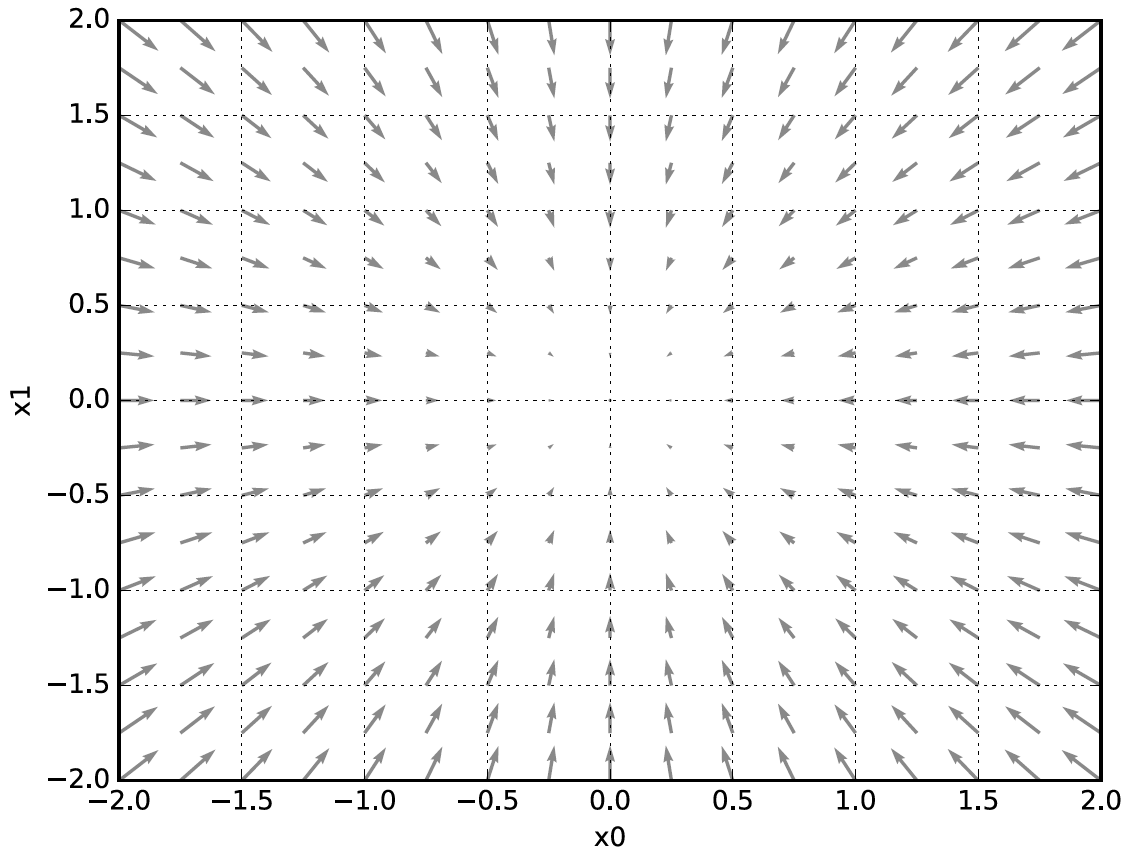

In [25]:
Image("image/fig 4-9.png")

기울기가 가리키는 쪽은 각 장소에서 **함수의 출력 값을 가장 크게 줄이는 방향**!

### 4.4.1 경사 하강법

- 최적의 매개변수(가중치, 편향)는 손실 함수가 최솟값이 될 때의 값
- 함수의 최솟값을 찾기위해 기울기를 이용
- 기울기가 꼭 최솟값을 가리키는 것은 아니지만, 그 방향으로 가야 함수의 값을 줄일 수 있음!

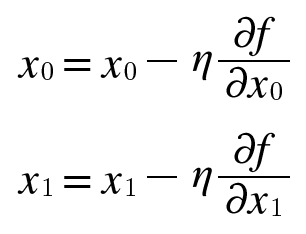

In [26]:
Image("image/e 4.7.png")

**η(에타)** -> 갱신하는 양(**=학습률**) </br>
학습률 값은 0.01 이나 0.001 등 미리 특정 값으로 정해두는데, 신경망 학습 과정에서 이 값을 변경하면서 올바르게 학습하고 있는지 확인해주어야 함

In [27]:
# 경사하강법 구현

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    
    x=init_x
    
    for i in range(step_num):
        
        grad = numerical_gradient(f,x) # 기울기 구하는 함수
        x -= lr*grad # 기울기의 부호와 반대인 방향으로 조정해 손실 함수의 값을 줄일 수 있음!
        
    return x

In [28]:
# 연습문제

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100) 

array([-6.11110793e-10,  8.14814391e-10])

-> 실제 최솟값은 (0,0)으로, 거의 정확한 결과를 얻었다고 볼 수 있음 </br>

**+)**
- 학습률이 너무 크거나 작으면 제대로된 결과를 볼 수 없음
- 학습률 같은 매개변수를 **하이퍼파라미터**라고 함. 가중치와 편향 같은 신경망의 매개변수들은 훈련 데이터와 학습 알고리즘에 의해서 자동으로 획득되는 매개변수이지만 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 함!

### 4.4.2 신경망에서의 기울기

In [29]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [30]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t) # numerical_gradient 내부에서 실행될 f 
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.06922095  0.03303166 -0.10225261]
 [ 0.10383143  0.04954749 -0.15337892]]


위는 dL/dW를 의미하는데, W의 차원과 같음! (=2x3)

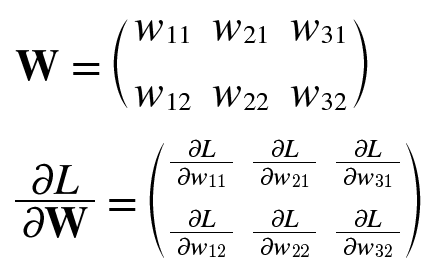

In [31]:
Image("image/e 4.8.png")

dL/dW11의 값은 약 0.57로, 이는 W11을 h만큼 늘리면 손실함수의 값이 0.57h만큼 증가한다는 의미!

## 4.5 학습 알고리즘 구현하기

### 4.5.1 2층 신경망 클래스 구현하기

In [32]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
        
    # 손실함수 계산
    def loss(self, x, t): # x : 입력 데이터, t : 정답 레이블
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    
    def numerical_gradient(self, x, t): # x : 입력 데이터, t : 정답 레이블
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [33]:
# 뒤에 나올 거
def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [34]:
# 예시 하나

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

훈련 데이터 중 일부를 무작위로 꺼내고, 그 미니배치에 대해서 경사법으로 매개변수를 갱신

In [35]:
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
import tensorflow as tf

train_data,test_data = tf.keras.datasets.mnist.load_data()
(x_train, t_train) = train_data
(x_test, t_test) = test_data

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [36]:
x_train = x_train.reshape(-1, 28**2)
x_test = x_test.reshape(-1, 28**2)

In [37]:
# 하이퍼파라미터

iters_num = 10000  # 경사법에 의한 갱신 반복 횟수
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []

In [38]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [ ]:
Image("image/fig 4-11.png")

학습을 반복함으로써 훈련 데이터의 미니배치에 대한 손실함수 값이 서서히 줄어드는 것을 볼 수 있음!

### 4.5.3 시험 데이터로 평가하기

- 신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지(오버피팅을 일으키지 않는지) 확인할 필요가 있음!
- **에폭(epoch)**: 학습에서 훈련 데이터를 모두 소진했을 때의 횟수</br>
    예를 들어 훈련 데이터 10000개를 100개의 미니배치로 학습할 경우 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 되는데, 이 경우 100회가 1에폭이 됨

In [ ]:
# 평가가 이루어질 수 있도록 수정

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

In [ ]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()